In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, pearsonr, spearmanr

In [17]:
df1 = pd.read_csv('dataset1_clean.csv')
df2 = pd.read_csv('dataset2_clean.csv')

In [18]:
#Transform and Categorise Columns

#Transform 'seconds_after_rat_arrival' to 'vigilance'
df1['vigilance'] = df1['seconds_after_rat_arrival']

# Categorise vigilance levels
def vigilance_category(val):
    if val < 10:
        return 'Low'
    elif val < 30:
        return 'Medium'
    else:
        return 'High'

df1['vigilance_level'] = df1['vigilance'].apply(vigilance_category)

# Categorise hours_after_sunset
def night_period(val):
    if val < 3:
        return 'Early night'
    else:
        return 'Late night'

df1['night_period'] = df1['hours_after_sunset'].apply(night_period)
df2['night_period'] = df2['hours_after_sunset'].apply(night_period)

Summary statistics for key variables (Dataset 1):
             vigilance  hours_after_sunset        risk      reward
count       878.000000          878.000000  878.000000  878.000000
mean        280.593394            5.623992    0.506834    0.542141
std         237.702841            2.343495    0.500238    0.498505
min           0.000000            0.138611    0.000000    0.000000
25%          90.000000            3.826528    0.000000    0.000000
50%         205.000000            5.703333    1.000000    1.000000
75%         444.500000            7.445694    1.000000    1.000000
max         949.000000           12.091944    1.000000    1.000000
range       949.000000           11.953333    1.000000    1.000000
variance  56502.640640            5.491969    0.250238    0.248507
median      205.000000            5.703333    1.000000    1.000000
Proportion of Risk by Vigilance Level:
risk                    0         1
vigilance_level                    
High             0.486726  0.513274

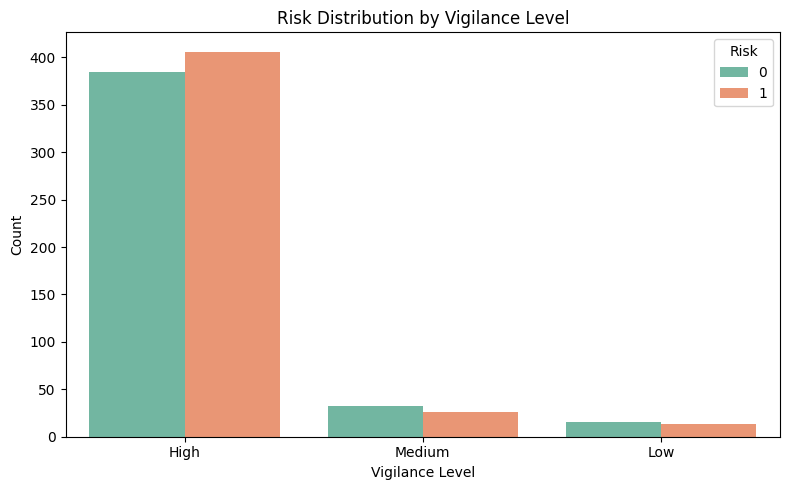

Proportion of Risk by Night Period:
risk                 0         1
night_period                    
Early night   0.442623  0.557377
Late night    0.501323  0.498677

With Differences:
risk                 0         1  Difference(1-0)
night_period                                     
Early night   0.442623  0.557377         0.114754
Late night    0.501323  0.498677        -0.002646
--------------------------------------------------


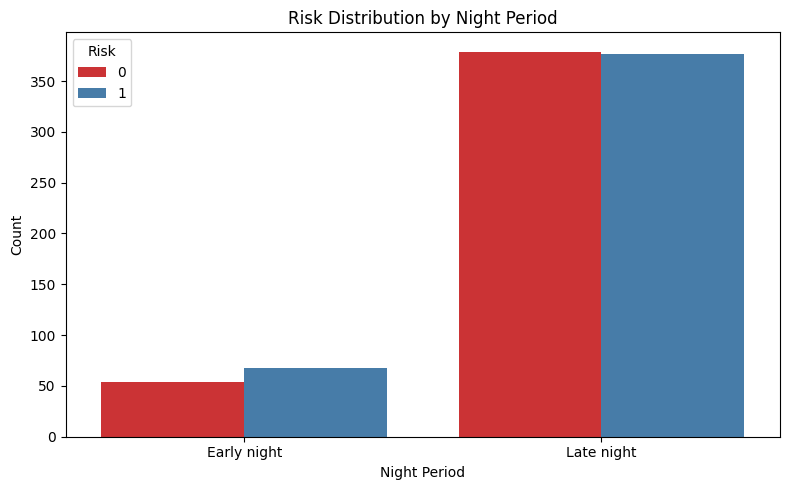

Proportion of Risk by Reward:
risk           0         1
reward                    
0       0.131841  0.868159
1       0.798319  0.201681

With Differences:
risk           0         1  Difference(1-0)
reward                                     
0       0.131841  0.868159         0.736318
1       0.798319  0.201681        -0.596639
--------------------------------------------------


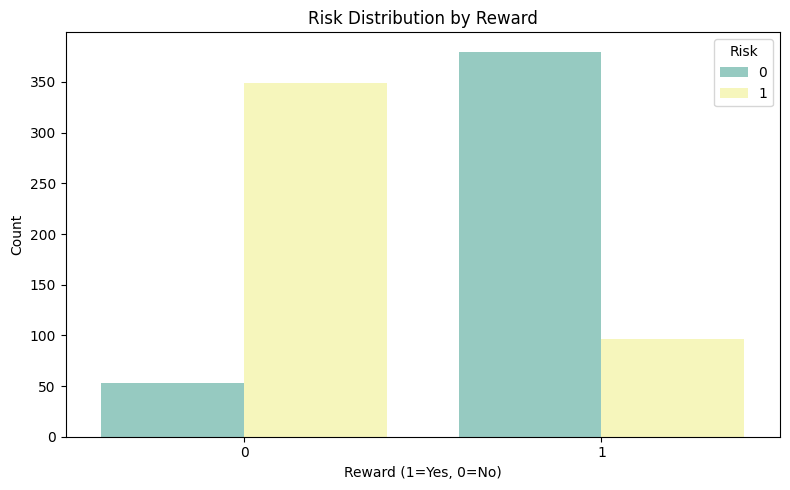

In [19]:
# --- Descriptive Statistics ---

desc_cols = ['vigilance', 'hours_after_sunset']
desc_stats = df1[desc_cols + ['risk', 'reward']].describe()
desc_stats.loc['range'] = desc_stats.loc['max'] - desc_stats.loc['min']
desc_stats.loc['variance'] = df1[desc_cols + ['risk', 'reward']].var()
desc_stats.loc['median'] = df1[desc_cols + ['risk', 'reward']].median()
desc_stats.loc['std'] = df1[desc_cols + ['risk', 'reward']].std()

print("Summary statistics for key variables (Dataset 1):")
print(desc_stats)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df1 = pd.read_csv('Dataset1_clean.csv')

# --- Transform and Categorise Columns ---
df1['vigilance'] = df1['seconds_after_rat_arrival']

# Categorise vigilance levels
def vigilance_category(val):
    if val < 10:
        return 'Low'
    elif val < 30:
        return 'Medium'
    else:
        return 'High'

df1['vigilance_level'] = df1['vigilance'].apply(vigilance_category)

# Categorise hours_after_sunset
def night_period(val):
    if val < 3:
        return 'Early night'
    else:
        return 'Late night'

df1['night_period'] = df1['hours_after_sunset'].apply(night_period)

# --- Descriptive Analysis ---

def print_with_difference(title, ct):
    print(title)
    print(ct)
    # Calculate and print difference between proportions of risk categories
    if len(ct.columns) == 2:  # assuming binary risk 0/1
        ct['Difference(1-0)'] = ct[1] - ct[0]
    print("\nWith Differences:")
    print(ct)
    print("-" * 50)

# 1. Vigilance Level vs Risk
vig_risk_ct = pd.crosstab(df1['vigilance_level'], df1['risk'], normalize='index')
print_with_difference("Proportion of Risk by Vigilance Level:", vig_risk_ct)

plt.figure(figsize=(8,5))
sns.countplot(x='vigilance_level', hue='risk', data=df1, palette='Set2')
plt.title('Risk Distribution by Vigilance Level')
plt.xlabel('Vigilance Level')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.tight_layout()
plt.show()

# 2. Night Period vs Risk
night_risk_ct = pd.crosstab(df1['night_period'], df1['risk'], normalize='index')
print_with_difference("Proportion of Risk by Night Period:", night_risk_ct)

plt.figure(figsize=(8,5))
sns.countplot(x='night_period', hue='risk', data=df1, palette='Set1')
plt.title('Risk Distribution by Night Period')
plt.xlabel('Night Period')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.tight_layout()
plt.show()

# 3. Reward vs Risk
reward_risk_ct = pd.crosstab(df1['reward'], df1['risk'], normalize='index')
print_with_difference("Proportion of Risk by Reward:", reward_risk_ct)

plt.figure(figsize=(8,5))
sns.countplot(x='reward', hue='risk', data=df1, palette='Set3')
plt.title('Risk Distribution by Reward')
plt.xlabel('Reward (1=Yes, 0=No)')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df1 = pd.read_csv('Dataset1_clean.csv')

# --- Transform and Categorise Columns ---
df1['vigilance'] = df1['seconds_after_rat_arrival']

# Categorise vigilance levels
def vigilance_category(val):
    if val < 10:
        return 'Low'
    elif val < 30:
        return 'Medium'
    else:
        return 'High'

df1['vigilance_level'] = df1['vigilance'].apply(vigilance_category)

# Categorise hours_after_sunset
def night_period(val):
    if val < 3:
        return 'Early night'
    else:
        return 'Late night'

df1['night_period'] = df1['hours_after_sunset'].apply(night_period)

# --- Descriptive Statistics ---
desc_cols = ['vigilance', 'hours_after_sunset', 'risk', 'reward']
desc_stats = df1[desc_cols].describe()
desc_stats.loc['range'] = desc_stats.loc['max'] - desc_stats.loc['min']
desc_stats.loc['variance'] = df1[desc_cols].var()
desc_stats.loc['median'] = df1[desc_cols].median()
desc_stats.loc['std'] = df1[desc_cols].std()

print("Summary statistics for key variables (Dataset 1):")
print(desc_stats)

# --- Descriptive Analysis ---
def print_with_difference(title, ct):
    print(title)
    ct_percent = ct * 100
    ct_percent['Difference(1-0)'] = ct_percent[1] - ct_percent[0]
    print(ct_percent.round(4))
    print("-" * 50)

# 1. Vigilance Level vs Risk
vig_risk_ct = pd.crosstab(df1['vigilance_level'], df1['risk'], normalize='index')
print_with_difference("Proportion of Risk by Vigilance Level (%):", vig_risk_ct)

# 2. Night Period vs Risk
night_risk_ct = pd.crosstab(df1['night_period'], df1['risk'], normalize='index')
print_with_difference("Proportion of Risk by Night Period (%):", night_risk_ct)

# 3. Reward vs Risk
reward_risk_ct = pd.crosstab(df1['reward'], df1['risk'], normalize='index')
print("Proportion of Risk by Reward:")
print(reward_risk_ct.round(6))
reward_risk_ct['Difference(1-0)'] = reward_risk_ct[1] - reward_risk_ct[0]
print("\nWith Differences:")
print(reward_risk_ct.round(6))
print("-" * 50)

# 4. Fight vs Risk
fight_risk_ct = pd.crosstab(df1['fight'], df1['risk'], normalize='index')
print_with_difference("Proportion of Risk by Fight (%):", fight_risk_ct)

# 5. Habit vs Risk
habit_risk_ct = pd.crosstab(df1['habit'], df1['risk'], normalize='index')
print_with_difference("Proportion of Risk by Habit (%):", habit_risk_ct)

# 6. Habit vs Reward
habit_reward_ct = pd.crosstab(df1['habit'], df1['reward'], normalize='index')
print_with_difference("Proportion of Reward by Habit (%):", habit_reward_ct)

# --- Additional Evidence Summary ---
print("\nAdditional Evidence from Descriptive Analysis")

# 🥊 Fight vs Risk
fight_1 = df1[df1['fight'] == 1]
fight_1_risk_1 = fight_1[fight_1['risk'] == 1].shape[0]
fight_1_total = fight_1.shape[0]
fight_risk_pct = (fight_1_risk_1 / fight_1_total) * 100
print(f"\n🥊 Fight vs Risk\nWhen fights occurred (fight = 1), {fight_risk_pct:.1f}% of bats took risks.")
print("➤ This shows that direct conflict is strongly linked to risk-taking, suggesting defensive or threat-driven behaviour.")

# 🥊 Fight vs Reward
fight_1_reward_0 = fight_1[fight_1['reward'] == 0].shape[0]
fight_reward_pct = (fight_1_reward_0 / fight_1_total) * 100
print(f"\n🥊 Fight vs Reward\nIn fight situations, {fight_reward_pct:.1f}% of bats did not receive a reward.")
print("➤ Bats are often not rewarded for fighting, showing their actions are driven by urgency or threat, not food.")

# --- Visualizations ---
# Fight vs Risk
fight_risk_plot = pd.crosstab(df1['fight'], df1['risk'], normalize='index')
fight_risk_plot.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Fight vs Risk (Proportion)')
plt.xlabel('Fight')
plt.ylabel('Proportion')
plt.legend(title='Risk')
plt.tight_layout()
plt.savefig('fight_vs_risk_plot.png')
plt.close()

# Fight vs Reward
fight_reward_plot = pd.crosstab(df1['fight'], df1['reward'], normalize='index')
fight_reward_plot.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Fight vs Reward (Proportion)')
plt.xlabel('Fight')
plt.ylabel('Proportion')
plt.legend(title='Reward')
plt.tight_layout()
plt.savefig('fight_vs_reward_plot.png')
plt.close()



Summary statistics for key variables (Dataset 1):
             vigilance  hours_after_sunset        risk      reward
count       878.000000          878.000000  878.000000  878.000000
mean        280.593394            5.623992    0.506834    0.542141
std         237.702841            2.343495    0.500238    0.498505
min           0.000000            0.138611    0.000000    0.000000
25%          90.000000            3.826528    0.000000    0.000000
50%         205.000000            5.703333    1.000000    1.000000
75%         444.500000            7.445694    1.000000    1.000000
max         949.000000           12.091944    1.000000    1.000000
range       949.000000           11.953333    1.000000    1.000000
variance  56502.640640            5.491969    0.250238    0.248507
median      205.000000            5.703333    1.000000    1.000000
Proportion of Risk by Vigilance Level (%):
risk                   0        1  Difference(1-0)
vigilance_level                                   
H

Proportion of Risk by Habit:
risk          0         1  Difference(1-0)
habit                                     
bat    0.000000  1.000000         1.000000
fast   1.000000  0.000000        -1.000000
other  0.883333  0.116667        -0.766667
pick   0.890323  0.109677        -0.780645
rat    0.000000  1.000000         1.000000

Proportion of Reward by Habit:
reward         0         1  Difference(1-0)
habit                                      
bat     0.640351  0.359649        -0.280702
fast    0.000000  1.000000         1.000000
other   1.000000  0.000000        -1.000000
pick    0.000000  1.000000         1.000000
rat     0.876221  0.123779        -0.752443


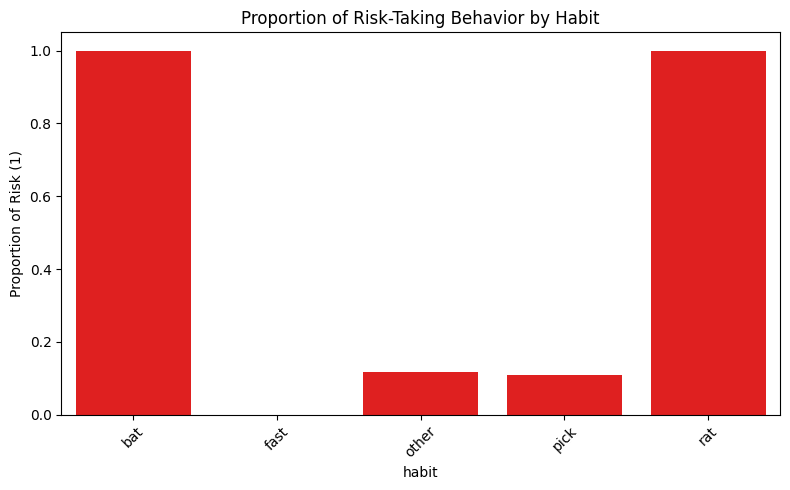

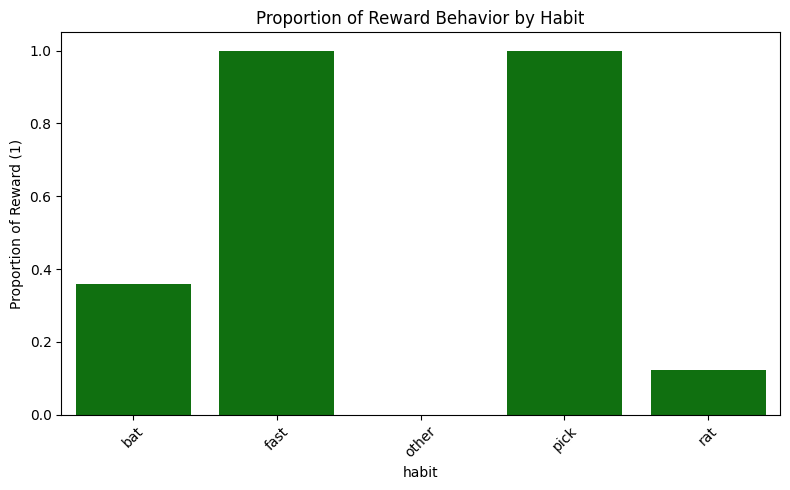

Proportion of Risk by Habit:
risk          0         1  Difference(1-0)
habit                                     
bat    0.000000  1.000000         1.000000
fast   1.000000  0.000000        -1.000000
other  0.883333  0.116667        -0.766667
pick   0.890323  0.109677        -0.780645
rat    0.000000  1.000000         1.000000

Proportion of Reward by Habit:
reward         0         1  Difference(1-0)
habit                                      
bat     0.640351  0.359649        -0.280702
fast    0.000000  1.000000         1.000000
other   1.000000  0.000000        -1.000000
pick    0.000000  1.000000         1.000000
rat     0.876221  0.123779        -0.752443


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Dataset1_clean.csv")

# --- Crosstab: Habit vs Risk ---
habit_risk_ct = pd.crosstab(df['habit'], df['risk'], normalize='index')
habit_risk_ct['Difference(1-0)'] = habit_risk_ct[1] - habit_risk_ct[0]

# --- Crosstab: Habit vs Reward ---
habit_reward_ct = pd.crosstab(df['habit'], df['reward'], normalize='index')
habit_reward_ct['Difference(1-0)'] = habit_reward_ct[1] - habit_reward_ct[0]

# Print tables
print("Proportion of Risk by Habit:")
print(habit_risk_ct.round(6))
print("\nProportion of Reward by Habit:")
print(habit_reward_ct.round(6))

# --- Visualization: Habit vs Risk ---
plt.figure(figsize=(8, 5))
sns.barplot(data=habit_risk_ct.reset_index(), x='habit', y=1, color='red')
plt.title("Proportion of Risk-Taking Behavior by Habit")
plt.ylabel("Proportion of Risk (1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("habit_vs_risk_plot.png")
plt.show()

# --- Visualization: Habit vs Reward ---
plt.figure(figsize=(8, 5))
sns.barplot(data=habit_reward_ct.reset_index(), x='habit', y=1, color='green')
plt.title("Proportion of Reward Behavior by Habit")
plt.ylabel("Proportion of Reward (1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("habit_vs_reward_plot.png")
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Dataset1_clean.csv")

# --- Crosstab: Habit vs Risk ---
habit_risk_ct = pd.crosstab(df['habit'], df['risk'], normalize='index')
habit_risk_ct['Difference(1-0)'] = habit_risk_ct[1] - habit_risk_ct[0]

# --- Crosstab: Habit vs Reward ---
habit_reward_ct = pd.crosstab(df['habit'], df['reward'], normalize='index')
habit_reward_ct['Difference(1-0)'] = habit_reward_ct[1] - habit_reward_ct[0]

# Save tables to CSV
habit_risk_ct.to_csv("habit_vs_risk_table.csv")
habit_reward_ct.to_csv("habit_vs_reward_table.csv")

# --- Visualization: Habit vs Risk ---
plt.figure(figsize=(8, 5))
sns.barplot(data=habit_risk_ct.reset_index(), x='habit', y=1, color='red')
plt.title("Proportion of Risk-Taking Behavior by Habit")
plt.ylabel("Proportion of Risk (1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("habit_vs_risk_plot.png")
plt.close()

# --- Visualization: Habit vs Reward ---
plt.figure(figsize=(8, 5))
sns.barplot(data=habit_reward_ct.reset_index(), x='habit', y=1, color='green')
plt.title("Proportion of Reward Behavior by Habit")
plt.ylabel("Proportion of Reward (1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("habit_vs_reward_plot.png")
plt.close()

# Print tables
print("Proportion of Risk by Habit:")
print(habit_risk_ct.round(6))
print("\nProportion of Reward by Habit:")
print(habit_reward_ct.round(6))



C:\Users\navod\AppData\Local\Temp\ipykernel_27232\2676789921.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=habit_risk_proportions.index, y=habit_risk_proportions.values, palette='viridis')


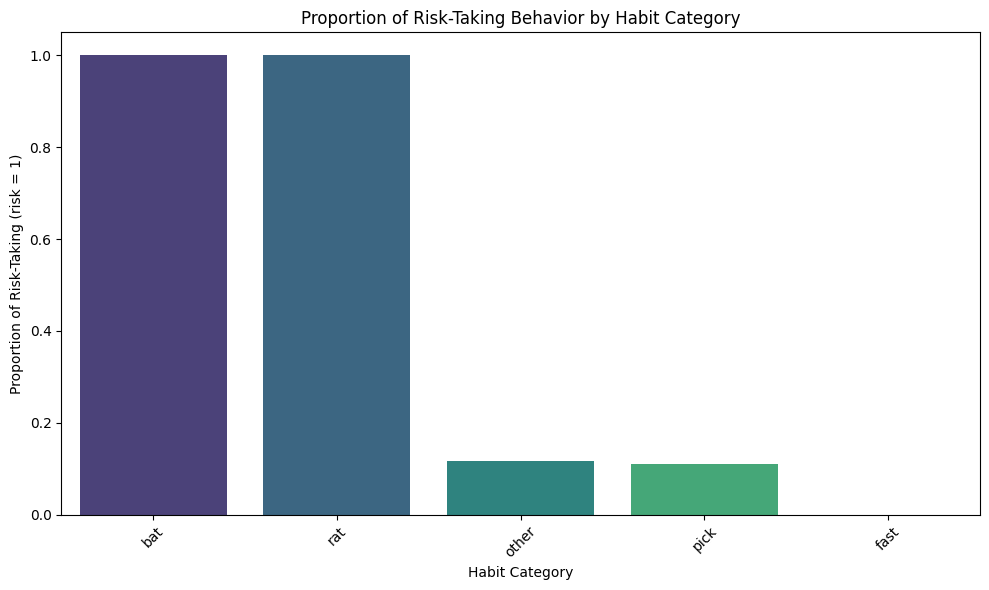

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Dataset1_clean.csv")

# Calculate the proportion of risk-taking behavior (risk = 1) for each habit category
habit_risk_proportions = df.groupby('habit')['risk'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=habit_risk_proportions.index, y=habit_risk_proportions.values, palette='viridis')
plt.title('Proportion of Risk-Taking Behavior by Habit Category')
plt.xlabel('Habit Category')
plt.ylabel('Proportion of Risk-Taking (risk = 1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("habit_vs_risk_plot.png")
plt.show()



C:\Users\navod\AppData\Local\Temp\ipykernel_27232\1585437240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk', data=df1, palette='Set2')


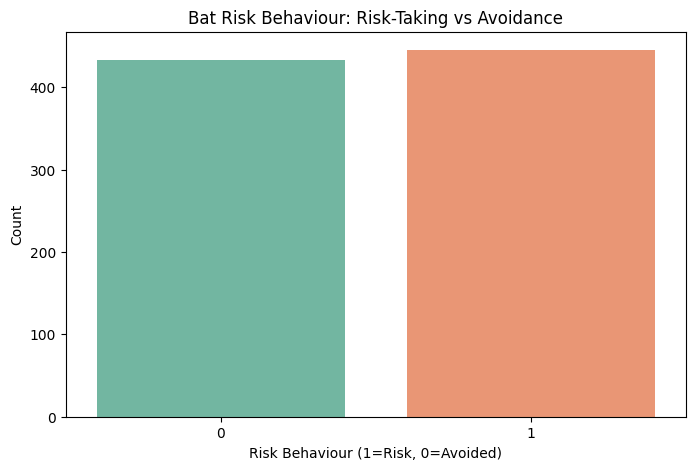

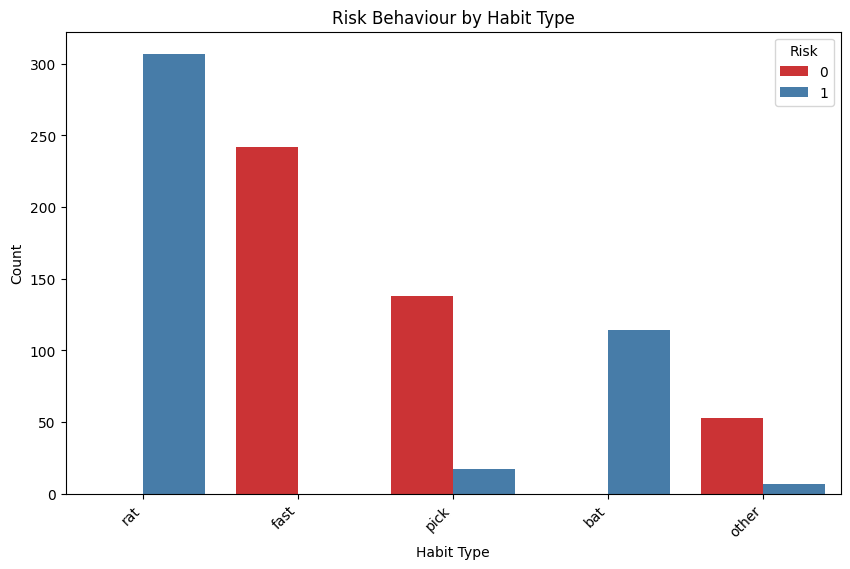

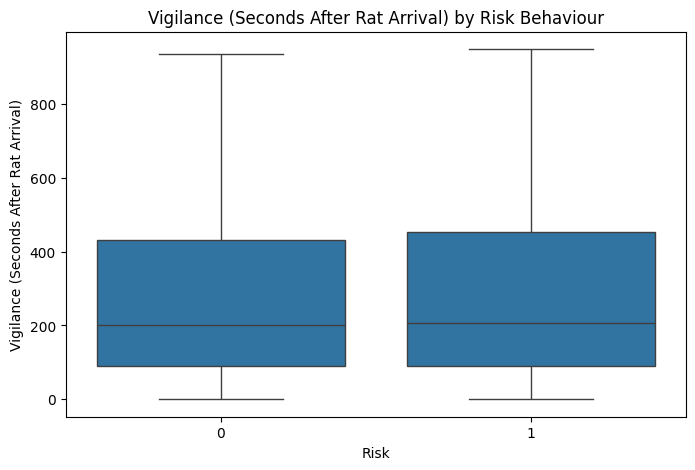

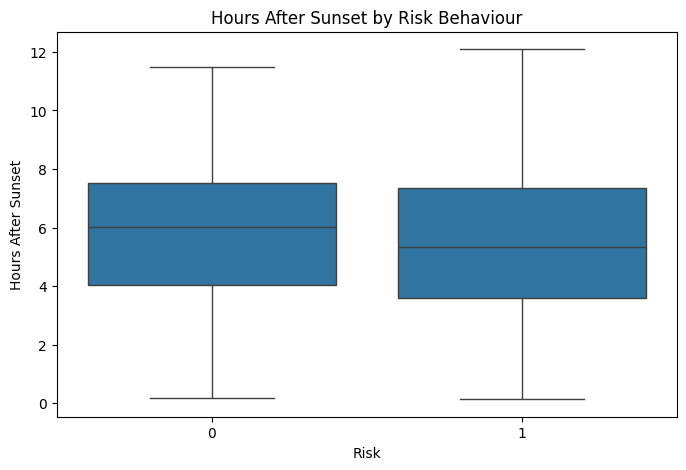

C:\Users\navod\AppData\Local\Temp\ipykernel_27232\1585437240.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vigilance_level', data=df1, palette='Set3')


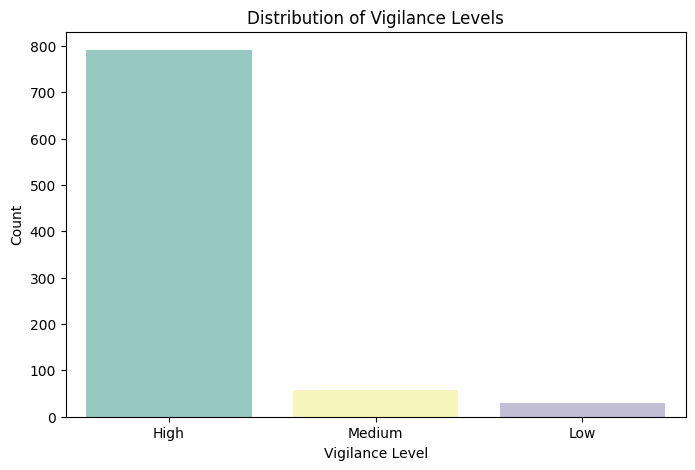

C:\Users\navod\AppData\Local\Temp\ipykernel_27232\1585437240.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='night_period', data=df1, palette='coolwarm')


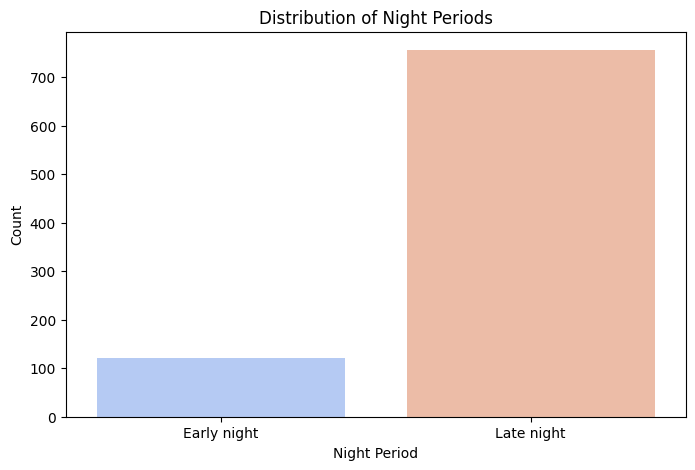

In [23]:
# --- Graphs: Risk Behaviour ---

plt.figure(figsize=(8,5))
sns.countplot(x='risk', data=df1, palette='Set2')
plt.title('Bat Risk Behaviour: Risk-Taking vs Avoidance')
plt.xlabel('Risk Behaviour (1=Risk, 0=Avoided)')
plt.ylabel('Count')
plt.show()

# Risk behaviour by habit type
plt.figure(figsize=(10,6))
sns.countplot(x='habit', hue='risk', data=df1, palette='Set1')
plt.title('Risk Behaviour by Habit Type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Habit Type')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.show()

# Distribution of vigilance by risk
plt.figure(figsize=(8,5))
sns.boxplot(x='risk', y='vigilance', data=df1)
plt.title('Vigilance (Seconds After Rat Arrival) by Risk Behaviour')
plt.xlabel('Risk')
plt.ylabel('Vigilance (Seconds After Rat Arrival)')
plt.show()

# Distribution of hours_after_sunset by risk
plt.figure(figsize=(8,5))
sns.boxplot(x='risk', y='hours_after_sunset', data=df1)
plt.title('Hours After Sunset by Risk Behaviour')
plt.xlabel('Risk')
plt.ylabel('Hours After Sunset')
plt.show()

# Vigilance level distribution
plt.figure(figsize=(8,5))
sns.countplot(x='vigilance_level', data=df1, palette='Set3')
plt.title('Distribution of Vigilance Levels')
plt.xlabel('Vigilance Level')
plt.ylabel('Count')
plt.show()

# Hours after sunset categorised
plt.figure(figsize=(8,5))
sns.countplot(x='night_period', data=df1, palette='coolwarm')
plt.title('Distribution of Night Periods')
plt.xlabel('Night Period')
plt.ylabel('Count')
plt.show()

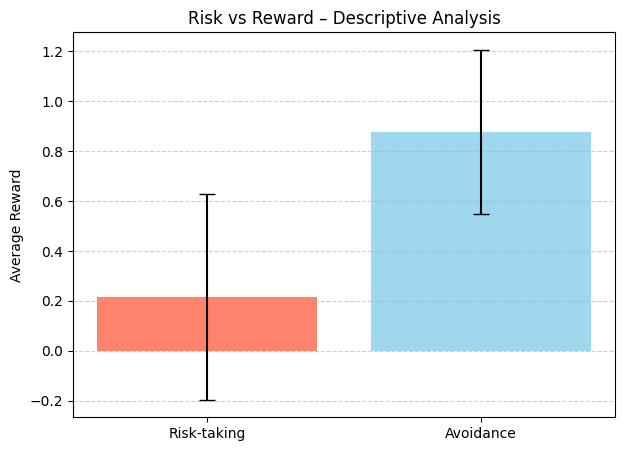

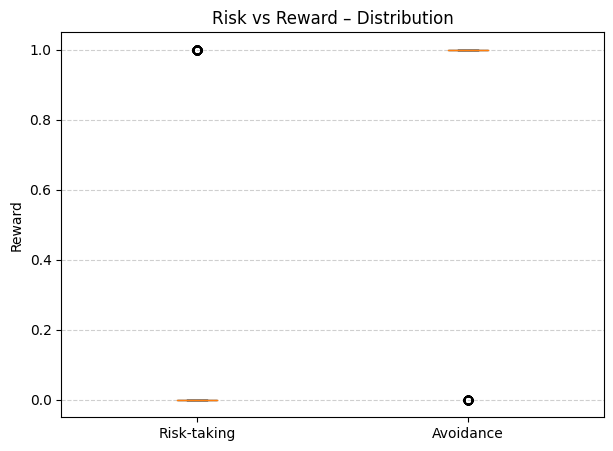

In [24]:
# --- Risk vs Reward Descriptive Analysis ---

# Group rewards by risk-taking vs avoidance
risk_group_rewards = df1[df1['risk'] == 1]['reward']
avoid_group_rewards = df1[df1['risk'] == 0]['reward']

# Calculate mean and std
groups = ['Risk-taking', 'Avoidance']
means = [risk_group_rewards.mean(), avoid_group_rewards.mean()]
stds = [risk_group_rewards.std(), avoid_group_rewards.std()]

# Plot bar chart with error bars
plt.figure(figsize=(7,5))
plt.bar(groups, means, yerr=stds, capsize=6, color=['tomato', 'skyblue'], alpha=0.8)
plt.ylabel("Average Reward")
plt.title("Risk vs Reward – Descriptive Analysis")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Optional: Boxplot to show distribution
plt.figure(figsize=(7,5))
plt.boxplot([risk_group_rewards.dropna(), avoid_group_rewards.dropna()],
            labels=['Risk-taking', 'Avoidance'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.ylabel("Reward")
plt.title("Risk vs Reward – Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


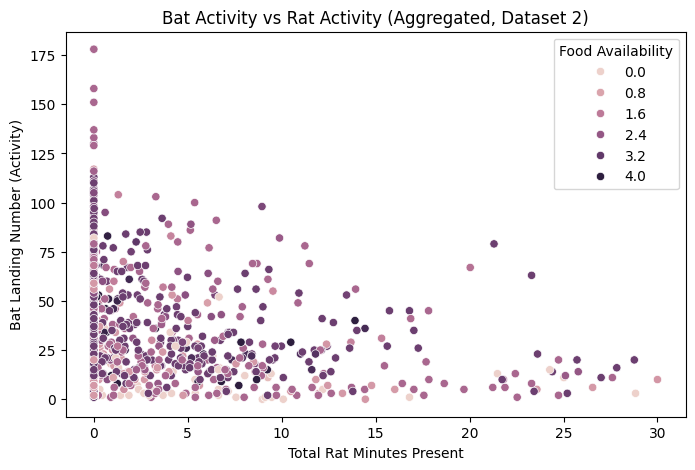

In [25]:
# --- Descriptive analysis on aggregated Dataset2 ---

plt.figure(figsize=(8,5))
sns.scatterplot(x='rat_minutes', y='bat_landing_number', hue='food_availability', data=df2)
plt.title('Bat Activity vs Rat Activity (Aggregated, Dataset 2)')
plt.xlabel('Total Rat Minutes Present')
plt.ylabel('Bat Landing Number (Activity)')
plt.legend(title='Food Availability')
plt.show()

Mean bat activity (rats present): 28.996031746031747
Mean bat activity (rats absent): 36.259179265658744


C:\Users\navod\AppData\Local\Temp\ipykernel_27232\963822752.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df2['rat_present'], y=df2['bat_landing_number'], palette='coolwarm')


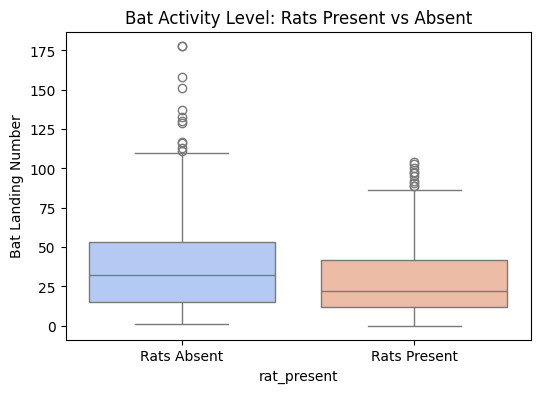

In [26]:
# General Patterns from Dataset 2 (Aggregated)

# Compare bat activity when rats present (rat_arrival_number>0) vs absent
df2['rat_present'] = (df2['rat_arrival_number'] > 0).astype(int)
activity_present = df2[df2['rat_present']==1]['bat_landing_number']
activity_absent = df2[df2['rat_present']==0]['bat_landing_number']

print("Mean bat activity (rats present):", activity_present.mean())
print("Mean bat activity (rats absent):", activity_absent.mean())

plt.figure(figsize=(6,4))
sns.boxplot(x=df2['rat_present'], y=df2['bat_landing_number'], palette='coolwarm')
plt.xticks([0,1], ['Rats Absent', 'Rats Present'])
plt.ylabel('Bat Landing Number')
plt.title('Bat Activity Level: Rats Present vs Absent')
plt.show()


In [27]:
# --- Inferential Statistics: Null Hypothesis Testing ---

# Test: Is there a significant difference in bat risk-taking when rats are present?
# We'll use vigilance as a vigilance measure, risk as risk-taking.
risk_taken = df1[df1['risk']==1]['vigilance']
risk_avoided = df1[df1['risk']==0]['vigilance']

# t-test for vigilance between risk/avoid groups
t_stat, p_value = stats.ttest_ind(risk_taken, risk_avoided, equal_var=False)
print(f"T-test for vigilance between risk/avoid groups: t={t_stat:.3f}, p={p_value:.4f}")

# Chi-square for risk-taking proportion by habit type
contingency = pd.crosstab(df1['habit'], df1['risk'])
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square test for association between habit type and risk-taking: chi2={chi2:.2f}, p={p_chi:.4f}")

# Mann-Whitney U Test for bat activity in Dataset2 (present vs absent)
u_stat, p_u = stats.mannwhitneyu(activity_present, activity_absent, alternative='two-sided')
print(f"Mann-Whitney U test for bat activity (rats present vs absent): U={u_stat}, p={p_u:.4f}")

T-test for vigilance between risk/avoid groups: t=0.494, p=0.6211
Chi-square test for association between habit type and risk-taking: chi2=792.71, p=0.0000
Mann-Whitney U test for bat activity (rats present vs absent): U=294506.0, p=0.0000


In [28]:
# --- Inferential Analysis ---

# Null hypothesis: no significant difference in bat risk behaviour when rats are present
# Compare vigilance and hours_after_sunset between risk-taking and avoidance groups

risk_group = df1[df1['risk'] == 1]
avoid_group = df1[df1['risk'] == 0]

# t-test or Mann-Whitney U for vigilance
stat, p = ttest_ind(risk_group['vigilance'].dropna(),
                    avoid_group['vigilance'].dropna(),
                    nan_policy='omit')
print(f"T-test for vigilance between Risk and Avoidance groups: stat={stat:.3f}, p={p:.3f}")
if p < 0.05:
    print("Significant difference (reject Ho)")
else:
    print("No significant difference (fail to reject Ho)")

# t-test or Mann-Whitney U for hours_after_sunset
stat_h, p_h = ttest_ind(risk_group['hours_after_sunset'].dropna(),
                        avoid_group['hours_after_sunset'].dropna(),
                        nan_policy='omit')
print(f"T-test for hours_after_sunset between Risk and Avoidance groups: stat={stat_h:.3f}, p={p_h:.3f}")
if p_h < 0.05:
    print("Significant difference (reject Ho)")
else:
    print("No significant difference (fail to reject Ho)")

# --- Correlations ---

corr_vig_risk, p_corr_vig_risk = pearsonr(df1['risk'], df1['vigilance'])
corr_hour_risk, p_corr_hour_risk = pearsonr(df1['risk'], df1['hours_after_sunset'])
corr_reward_risk, p_corr_reward_risk = pearsonr(df1['risk'], df1['reward'])

print(f"Correlation between risk and vigilance: r={corr_vig_risk:.2f}, p={p_corr_vig_risk:.3f}")
print(f"Correlation between risk and hours_after_sunset: r={corr_hour_risk:.2f}, p={p_corr_hour_risk:.3f}")
print(f"Correlation between risk and reward: r={corr_reward_risk:.2f}, p={p_corr_reward_risk:.3f}")

T-test for vigilance between Risk and Avoidance groups: stat=0.494, p=0.621
No significant difference (fail to reject Ho)
T-test for hours_after_sunset between Risk and Avoidance groups: stat=-2.407, p=0.016
Significant difference (reject Ho)
Correlation between risk and vigilance: r=0.02, p=0.621
Correlation between risk and hours_after_sunset: r=-0.08, p=0.016
Correlation between risk and reward: r=-0.66, p=0.000


Summary statistics for selected variables:
             vigilance  hours_after_sunset        risk      reward
count       878.000000          878.000000  878.000000  878.000000
mean        280.593394            5.623992    0.506834    0.542141
std         237.702841            2.343495    0.500238    0.498505
min           0.000000            0.138611    0.000000    0.000000
25%          90.000000            3.826528    0.000000    0.000000
50%         205.000000            5.703333    1.000000    1.000000
75%         444.500000            7.445694    1.000000    1.000000
max         949.000000           12.091944    1.000000    1.000000
range       949.000000           11.953333    1.000000    1.000000
variance  56502.640640            5.491969    0.250238    0.248507
median      205.000000            5.703333    1.000000    1.000000
Proportion of Risk by Vigilance Level (%):
risk                   0        1  Difference(1-0)
vigilance_level                                   
High    

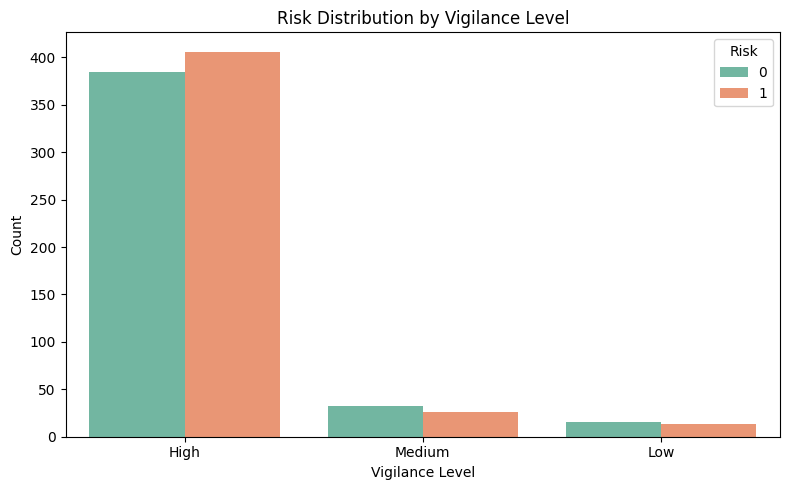

Proportion of Risk by Night Period (%):
risk                0        1  Difference(1-0)
night_period                                   
Early night   44.2623  55.7377          11.4754
Late night    50.1323  49.8677          -0.2646
--------------------------------------------------


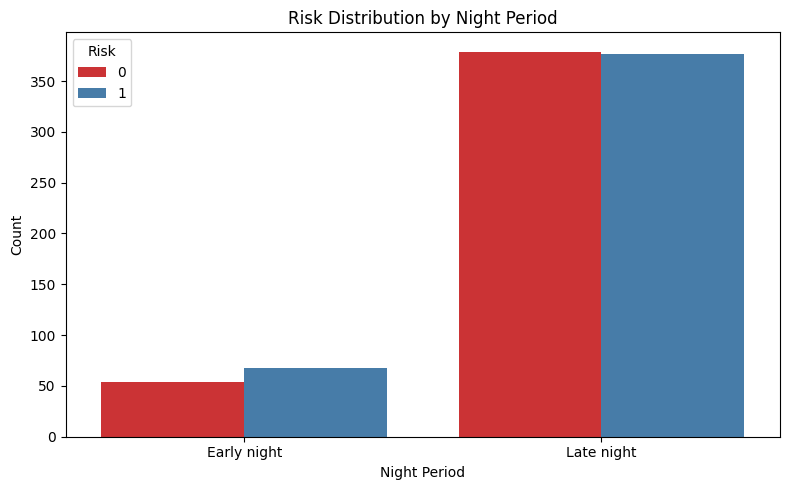

Proportion of Risk by Reward (%):
risk          0        1  Difference(1-0)
reward                                   
0       13.1841  86.8159          73.6318
1       79.8319  20.1681         -59.6639
--------------------------------------------------


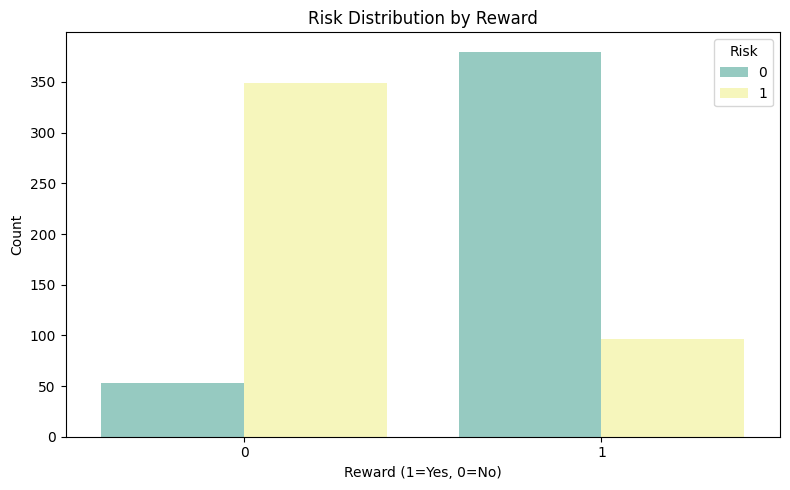

Proportion of Risk by Fight (%):
risk         0        1  Difference(1-0)
fight                                   
0      51.1269  48.8731          -2.2539
1       5.7143  94.2857          88.5714
--------------------------------------------------
Proportion of Risk by Habit (%):
risk          0         1  Difference(1-0)
habit                                     
bat      0.0000  100.0000         100.0000
fast   100.0000    0.0000        -100.0000
other   88.3333   11.6667         -76.6667
pick    89.0323   10.9677         -78.0645
rat      0.0000  100.0000         100.0000
--------------------------------------------------
Proportion of Reward by Habit (%):
reward         0         1  Difference(1-0)
habit                                      
bat      64.0351   35.9649         -28.0702
fast      0.0000  100.0000         100.0000
other   100.0000    0.0000        -100.0000
pick      0.0000  100.0000         100.0000
rat      87.6221   12.3779         -75.2443
------------------------

C:\Users\navod\AppData\Local\Temp\ipykernel_27232\4154627405.py:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=habit_risk_proportions.index, y=habit_risk_proportions.values, palette='viridis')


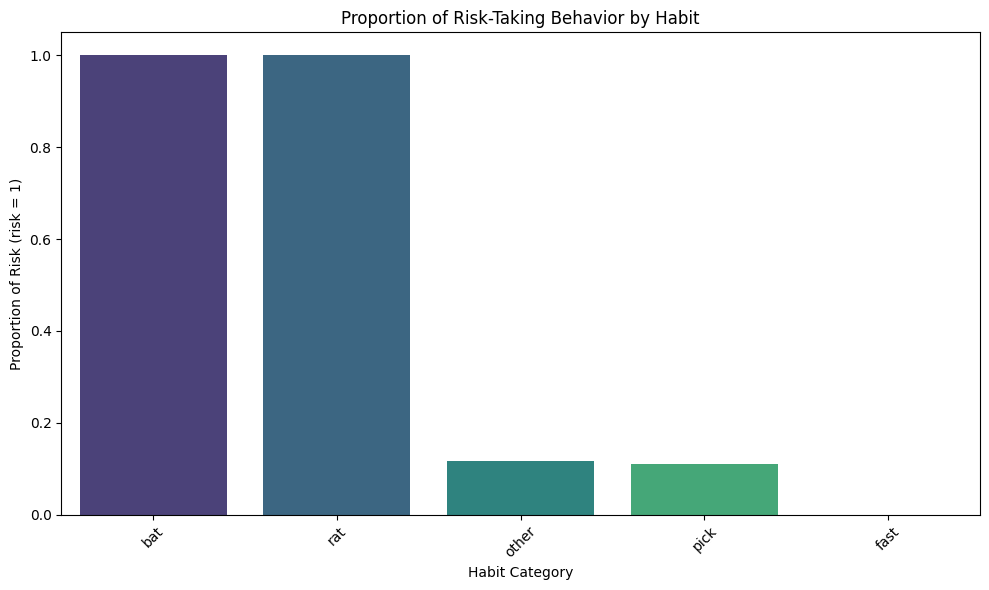

C:\Users\navod\AppData\Local\Temp\ipykernel_27232\4154627405.py:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=habit_reward_proportions.index, y=habit_reward_proportions.values, palette='mako')


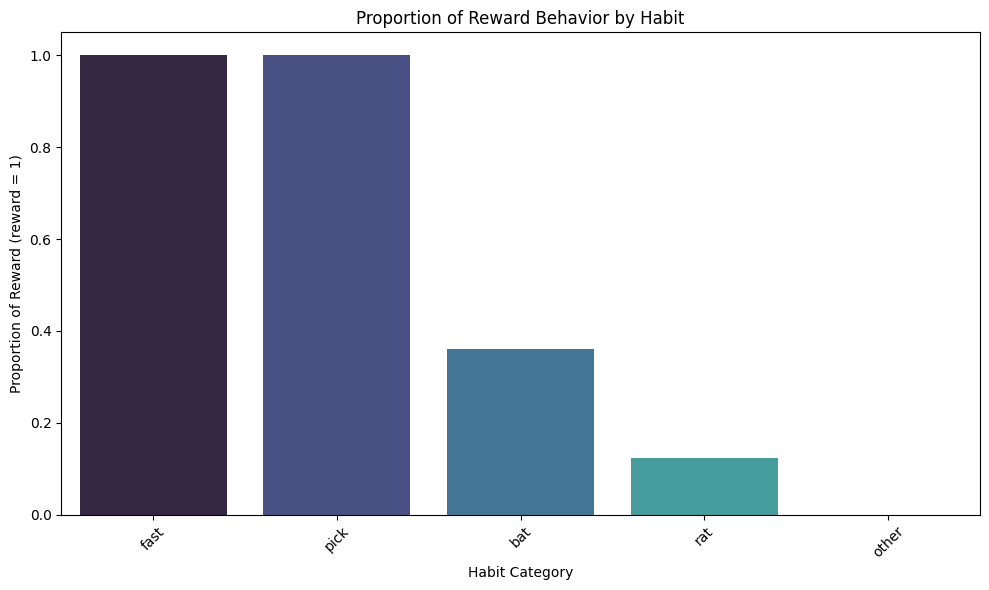


Tables have been saved as CSV and plots exported as PNG files.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------
# Load the dataset
# ---------------------------------------------------
df = pd.read_csv("Dataset1_clean.csv")

# ---------------------------------------------------
# Data transformation and categorization
# ---------------------------------------------------

# Create a new column 'vigilance' from seconds_after_rat_arrival
df['vigilance'] = df['seconds_after_rat_arrival']

# Categorize vigilance levels based on the duration
def vigilance_category(val):
    if val < 10:
        return 'Low'
    elif val < 30:
        return 'Medium'
    else:
        return 'High'
df['vigilance_level'] = df['vigilance'].apply(vigilance_category)

# Categorize the time of night based on hours_after_sunset
def night_period(val):
    return 'Early night' if val < 3 else 'Late night'
df['night_period'] = df['hours_after_sunset'].apply(night_period)

# ---------------------------------------------------
# Descriptive statistics
# ---------------------------------------------------
desc_cols = ['vigilance', 'hours_after_sunset', 'risk', 'reward']
desc_stats = df[desc_cols].describe()
desc_stats.loc['range'] = desc_stats.loc['max'] - desc_stats.loc['min']
desc_stats.loc['variance'] = df[desc_cols].var()
desc_stats.loc['median'] = df[desc_cols].median()
desc_stats.loc['std'] = df[desc_cols].std()

print("Summary statistics for selected variables:")
print(desc_stats)

# ---------------------------------------------------
# Helper function for printing proportions and differences
# ---------------------------------------------------
def print_with_difference(title, ct):
    print(title)
    ct_percent = ct * 100
    if 0 in ct_percent.columns and 1 in ct_percent.columns:
        ct_percent['Difference(1-0)'] = ct_percent[1] - ct_percent[0]
    print(ct_percent.round(4))
    print("-" * 50)

# ---------------------------------------------------
# Descriptive analysis (Crosstabs and visualizations)
# ---------------------------------------------------

# 1. Vigilance Level vs Risk
vig_risk_ct = pd.crosstab(df['vigilance_level'], df['risk'], normalize='index')
print_with_difference("Proportion of Risk by Vigilance Level (%):", vig_risk_ct)

plt.figure(figsize=(8, 5))
sns.countplot(x='vigilance_level', hue='risk', data=df, palette='Set2')
plt.title('Risk Distribution by Vigilance Level')
plt.xlabel('Vigilance Level')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.tight_layout()
plt.show()

# 2. Night Period vs Risk
night_risk_ct = pd.crosstab(df['night_period'], df['risk'], normalize='index')
print_with_difference("Proportion of Risk by Night Period (%):", night_risk_ct)

plt.figure(figsize=(8, 5))
sns.countplot(x='night_period', hue='risk', data=df, palette='Set1')
plt.title('Risk Distribution by Night Period')
plt.xlabel('Night Period')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.tight_layout()
plt.show()

# 3. Reward vs Risk
reward_risk_ct = pd.crosstab(df['reward'], df['risk'], normalize='index')
print_with_difference("Proportion of Risk by Reward (%):", reward_risk_ct)

plt.figure(figsize=(8, 5))
sns.countplot(x='reward', hue='risk', data=df, palette='Set3')
plt.title('Risk Distribution by Reward')
plt.xlabel('Reward (1=Yes, 0=No)')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.tight_layout()
plt.show()

# 4. Fight vs Risk
fight_risk_ct = pd.crosstab(df['fight'], df['risk'], normalize='index')
print_with_difference("Proportion of Risk by Fight (%):", fight_risk_ct)

# 5. Habit vs Risk
habit_risk_ct = pd.crosstab(df['habit'], df['risk'], normalize='index')
print_with_difference("Proportion of Risk by Habit (%):", habit_risk_ct)

# 6. Habit vs Reward
habit_reward_ct = pd.crosstab(df['habit'], df['reward'], normalize='index')
print_with_difference("Proportion of Reward by Habit (%):", habit_reward_ct)

# ---------------------------------------------------
# Additional evidence summary
# ---------------------------------------------------

print("\nAdditional Evidence from Descriptive Analysis")

# Fight vs Risk
fight_1 = df[df['fight'] == 1]
fight_1_risk_1 = fight_1[fight_1['risk'] == 1].shape[0]
fight_1_total = fight_1.shape[0]
if fight_1_total > 0:
    fight_risk_pct = (fight_1_risk_1 / fight_1_total) * 100
    print(f"\nFight vs Risk\nWhen fights occurred (fight = 1), {fight_risk_pct:.1f}% of bats took risks.")
    print("This shows that direct conflict is closely linked to risk-taking behaviour.")

# Fight vs Reward
fight_1_reward_0 = fight_1[fight_1['reward'] == 0].shape[0]
if fight_1_total > 0:
    fight_reward_pct = (fight_1_reward_0 / fight_1_total) * 100
    print(f"\nFight vs Reward\nIn fight situations, {fight_reward_pct:.1f}% of bats did not receive a reward.")
    print("This suggests that bats often take risks without guaranteed rewards.")

# ---------------------------------------------------
# Visualizations for fight and habit
# ---------------------------------------------------

# Fight vs Risk
fight_risk_plot = pd.crosstab(df['fight'], df['risk'], normalize='index')
fight_risk_plot.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Fight vs Risk (Proportion)')
plt.xlabel('Fight')
plt.ylabel('Proportion')
plt.legend(title='Risk')
plt.tight_layout()
plt.savefig('fight_vs_risk_plot.png')
plt.close()

# Fight vs Reward
fight_reward_plot = pd.crosstab(df['fight'], df['reward'], normalize='index')
fight_reward_plot.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Fight vs Reward (Proportion)')
plt.xlabel('Fight')
plt.ylabel('Proportion')
plt.legend(title='Reward')
plt.tight_layout()
plt.savefig('fight_vs_reward_plot.png')
plt.close()

# Habit vs Risk (Barplot)
habit_risk_proportions = df.groupby('habit')['risk'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=habit_risk_proportions.index, y=habit_risk_proportions.values, palette='viridis')
plt.title('Proportion of Risk-Taking Behavior by Habit')
plt.xlabel('Habit Category')
plt.ylabel('Proportion of Risk (risk = 1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("habit_vs_risk_plot.png")
plt.show()

# Habit vs Reward (Barplot)
habit_reward_proportions = df.groupby('habit')['reward'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=habit_reward_proportions.index, y=habit_reward_proportions.values, palette='mako')
plt.title('Proportion of Reward Behavior by Habit')
plt.xlabel('Habit Category')
plt.ylabel('Proportion of Reward (reward = 1)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("habit_vs_reward_plot.png")
plt.show()

# ---------------------------------------------------
# Save tables to CSV for reporting
# ---------------------------------------------------
habit_risk_ct.to_csv("habit_vs_risk_table.csv")
habit_reward_ct.to_csv("habit_vs_reward_table.csv")

print("\nTables have been saved as CSV and plots exported as PNG files.")


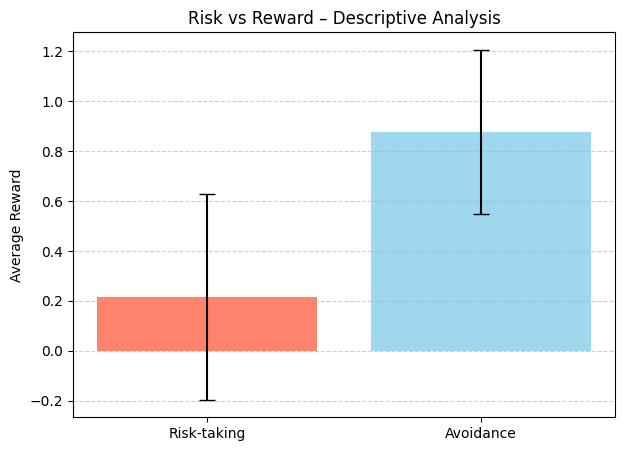

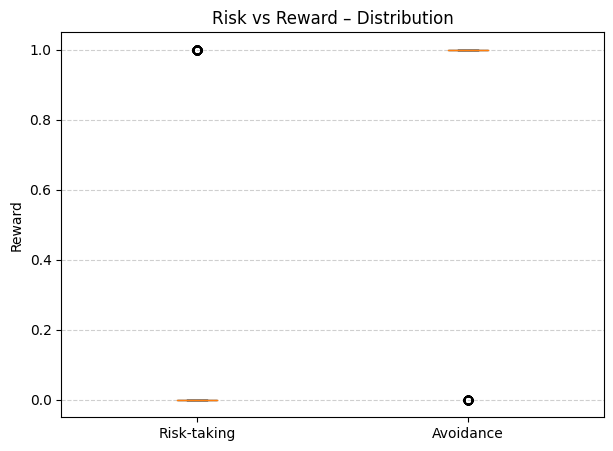

In [30]:
# --- Risk vs Reward Descriptive Analysis ---

# Group rewards by risk-taking vs avoidance
risk_group_rewards = df1[df1['risk'] == 1]['reward']
avoid_group_rewards = df1[df1['risk'] == 0]['reward']

# Calculate mean and std
groups = ['Risk-taking', 'Avoidance']
means = [risk_group_rewards.mean(), avoid_group_rewards.mean()]
stds = [risk_group_rewards.std(), avoid_group_rewards.std()]

# Plot bar chart with error bars
plt.figure(figsize=(7,5))
plt.bar(groups, means, yerr=stds, capsize=6, color=['tomato', 'skyblue'], alpha=0.8)
plt.ylabel("Average Reward")
plt.title("Risk vs Reward – Descriptive Analysis")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Optional: Boxplot to show distribution
plt.figure(figsize=(7,5))
plt.boxplot([risk_group_rewards.dropna(), avoid_group_rewards.dropna()],
            labels=['Risk-taking', 'Avoidance'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'))
plt.ylabel("Reward")
plt.title("Risk vs Reward – Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
